In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def getDf():
    files = {}
    for size in [3910000, 3920000, 3930000,3940000]:
        with open("../result/resultRustOwnerType_init_true_{}.txt".format(size), "r") as f:
            files["size{}".format(size)] = [s.strip().split("#") for s in f.readlines()]

    dfs = {}
    for k in files.keys():
        df = pd.DataFrame(files[k])
        new_header = df.iloc[0]
        df = df[1:]
        df.columns = new_header
        dfs[k] = df
    data = dfs['size3910000']
    for s in [3920000, 3930000,3940000]:
        data = pd.concat([data, dfs["size{}".format(s)]])
    data = data.astype({"datastructure": str,"init": str , "size": int, "field": str, "createtime":int,  \
                        'accesstime': int,"totaltime": int})
    return data

In [13]:
df = getDf()

In [16]:
df.head()

,datastructure,init,size,field,createtime,accesstime,totaltime
1,[RustVector],true,3910000,"""own""",1103,28265,34193
2,[RustVector],true,3910000,"""own""",841,25987,31638
3,[RustVector],true,3910000,"""own""",883,26389,31947
4,[RustVector],true,3910000,"""own""",850,26103,31706
5,[RustVector],true,3910000,"""own""",919,25690,31348


In [14]:
df_avg = df.groupby(["size", "field"]).mean().reset_index()

In [15]:
df_avg

,size,field,createtime,accesstime,totaltime
0,3910000,"""own""",919.2,26486.8,32166.4
1,3910000,"""reference""",274.4,27604.2,32606.6
2,3910000,"""slice""",467.0,26167.2,31429.2
3,3920000,"""own""",877.6,25995.4,31608.4
4,3920000,"""reference""",279.0,26953.6,32015.0
5,3920000,"""slice""",466.8,25864.8,31166.8
6,3930000,"""own""",890.0,26234.0,31890.2
7,3930000,"""reference""",273.2,27136.4,32193.6
8,3930000,"""slice""",469.4,25789.4,31070.2
9,3940000,"""own""",897.0,26427.4,32164.8


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


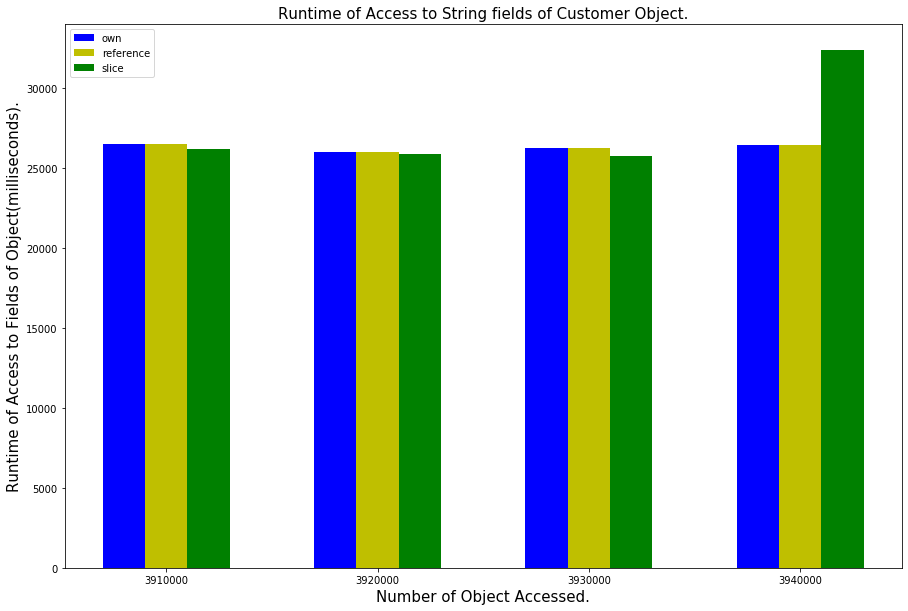

In [17]:
own = df_avg[df_avg["field"] == '"own"']
reference = df_avg[df_avg["field"] == '"own"']
slice_type = df_avg[df_avg["field"] == '"slice"']
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(df_avg['size'].nunique())
b1 = ax.bar(idx - w, own["accesstime"], width = w, color ='b', align = 'center')
b2 = ax.bar(idx , reference["accesstime"], width = w, color ='y', align = 'center')
b3 = ax.bar(idx + w, slice_type["accesstime"], width = w, color ='g', align = 'center')
label = np.sort(df_avg['size'].unique())
ax.set_xticks(idx)
ax.set_xticklabels(label)
ax.set_xlabel("Number of Object Accessed.", fontsize = 15)
ax.set_ylabel("Runtime of Access to Fields of Object(milliseconds).", fontsize = 15)
ax.set_title("Runtime of Access to String fields of Customer Object.", fontsize = 15)
ax.legend((b1, b2, b3), ("own", "reference", "slice"))
#ax.set_yscale('log')
fig.savefig("rust_different_insertion_init.eps")
#fig.savefig("rust_borrowing.png")
plt.show()